# Importação do dataset

O dataset usado foi criado através da junção de diversas imagens, onde foi criado numpy arrays para as imagens e para as labels, respectivamente. 

Por seguinte, foi usado a biblioteca h5py para criar arquivos HDF5¹ destes numpy arrays. 

Para realizar isso, criei uma classe a parte onde foi executada localmente. O fonte desta classe pode ser encontrada aqui: [modelagem do dataset](https://github.com/gabcastro/Unisinos-AI-CNNKaggleDataset/blob/master/modelling_dataset.py).

----

¹ **HDF5** é um modelo de dados que permite que seu conteúdo possa ser facilmente manipulado – mesmo quando o tamanho do dataset ultrapassa os gigabytes

In [21]:
import h5py

from google.colab import drive
drive.mount('/content/drive/')

h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/dataset.h5','r')
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
h5f.close()    

h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/labels.h5','r')
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
h5f.close()   

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Imports

In [10]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

import keras

Using TensorFlow backend.


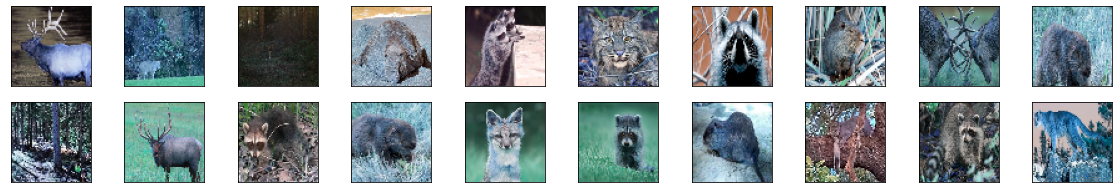

In [8]:
fig = plt.figure(figsize=(20,5))
for i in range(20):
    ax = fig.add_subplot(3,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

# Normalização

In [0]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = X_train[2000:], X_train[:2000]
(y_train, y_valid) = y_train[2000:], y_train[:2000]

# Resumo dos conjuntos de dados

In [36]:
summary_shape = {}

summary_shape['X_train'] = X_train.shape
summary_shape['X_test'] = X_test.shape
summary_shape['x_valid'] = x_valid.shape
summary_shape['y_train'] = y_train.shape
summary_shape['y_test'] = y_test.shape
summary_shape['y_valid'] = y_valid.shape

pd.DataFrame(summary_shape.items(), columns=['In/Out', 'Total shape'])

,In/Out,Total shape
0,X_train,"(11852, 64, 64, 3)"
1,X_test,"(2092, 64, 64, 3)"
2,x_valid,"(2000, 64, 64, 3)"
3,y_train,"(9863, 20, 2)"
4,y_test,"(2094, 20, 2)"
5,y_valid,"(2000, 20, 2)"


# Deep learning model(s)